# MUSIC RECOMMENDATION SYSTEM

## Explanation of the Spotify Data Collection 


### Key Components

### 1. **Imports**
- **`import base64`**: This library is used to encode the client ID and secret into a base64 string for authentication with the Spotify API.
- **`import requests`**: This library allows for sending HTTP requests to access the Spotify API endpoints.
- **`import pandas as pd`**: Pandas is used for data manipulation and analysis, particularly for creating and managing data in DataFrame format.
- **`import time`**: This library is used to introduce delays in the code execution to comply with API rate limits.

### 2. **Authentication**
- **`client_id` and `client_secret`**: These are unique identifiers for the application registered on the Spotify Developer Dashboard, required for accessing the API.
- **Base64 Encoding**: The `client_id` and `client_secret` are combined and encoded in base64 format to create a secure authorization string.

### 3. **Access Token Retrieval**
- An HTTP POST request is sent to the Spotify token endpoint to obtain an access token. This token is necessary for authenticating subsequent requests to the Spotify API.

### 4. **Data Fetching Function**
- **`fetch_spotify_data(genre, limit=50, offset=0)`**: This function takes a music genre as input and retrieves a specified number of tracks from the Spotify API. It handles:
  - **Searching Tracks**: Uses the Spotify Search API to find tracks by genre.
  - **Retrieving Audio Features**: For each track, it calls the Audio Features API to obtain additional details such as danceability, energy, and tempo.

### 5. **Data Collection Loop**
- The script iterates through a predefined list of music genres and fetches track data for each genre. It concatenates the results into a single DataFrame.

### 6. **Rate Limiting**
- **`time.sleep(1)`**: A delay of one second between requests is introduced to avoid exceeding Spotify's rate limits.

### 7. **Saving Data**
- The final DataFrame containing all collected track data is saved to a CSV file named `spotify_large_dataset.csv`.

## Key Terms

- **API (Application Programming Interface)**: A set of protocols for building and interacting with software applications. The Spotify API allows developers to access Spotify's music catalog and user-related data.
- **DataFrame**: A two-dimensional labeled data structure used in Pandas, similar to a table in a database or a spreadsheet. It is used to store and manipulate the track data.
- **Access Token**: A token required for authentication to access protected resources on an API. It is obtained through OAuth 2.0 authentication flows.
- **HTTP Request**: A message sent by a client to a server, often to retrieve data. In this case, GET and POST requests are used to interact with the Spotify API.
- **Genre**: A category of music that defines the style or characteristics of tracks. This script fetches data for various genres.


In [30]:
import base64
import requests
import pandas as pd
import time

client_id = 'Your_client_id'
client_secret = 'Your_secret_key'

# Encoding client ID and secret for authentication
auth_str = f"{client_id}:{client_secret}"
b64_auth_str = base64.b64encode(auth_str.encode()).decode()

# Getting access token from Spotify
url = "https://accounts.spotify.com/api/token"
headers = {
    "Authorization": f"Basic {b64_auth_str}",
    "Content-Type": "application/x-www-form-urlencoded"
}
data = {"grant_type": "client_credentials"}
response = requests.post(url, headers=headers, data=data)
token = response.json().get("access_token")

# Definig function to search for tracks in specific genre
def fetch_spotify_data(genre, limit=50, offset=0):
    search_url = "https://api.spotify.com/v1/search"
    search_headers = {
        "Authorization": f"Bearer {token}"
    }
    search_params = {
        "q": f"genre:{genre}",
        "type": "track",
        "limit": limit,
        "offset": offset
    }
    response = requests.get(search_url, headers=search_headers, params=search_params)
    response_data = response.json()
    
    data = []
    if "tracks" in response_data and "items" in response_data["tracks"]:
        for track in response_data['tracks']['items']:
            track_id = track['id']
            track_name = track['name']
            artist_name = track['artists'][0]['name']
            album_name = track['album']['name']
            release_date = track['album']['release_date']
            popularity = track['popularity']
            
            # Fetching audio features for each track
            features_url = f"https://api.spotify.com/v1/audio-features/{track_id}"
            features_response = requests.get(features_url, headers=search_headers)
            features_data = features_response.json()
            
            if features_data:
                data.append({
                    'genre': genre,  
                    'track_id': track_id,
                    'track_name': track_name,
                    'artist_name': artist_name,
                    'album_name': album_name,
                    'release_date': release_date,
                    'popularity': popularity,
                    'danceability': features_data.get('danceability'),
                    'energy': features_data.get('energy'),
                    'tempo': features_data.get('tempo'),
                    'speechiness': features_data.get('speechiness'),
                    'acousticness': features_data.get('acousticness'),
                    'instrumentalness': features_data.get('instrumentalness'),
                    'liveness': features_data.get('liveness'),
                    'valence': features_data.get('valence'),
                    'loudness': features_data.get('loudness')
                })
    return pd.DataFrame(data)

# Defining genres 
genres = ["pop", "rock", "hip-hop", "jazz", "classical", "country", "electronic", "blues", "folk", "reggae", "trance", "bollywood", "k-pop", "disco", "techno", "rhythm and blues", "Rap"]

# Initializing empty DataFrame to store data
all_data = pd.DataFrame()

# Looping through genres to fetch data
for genre in genres:
    print(f"Fetching data for genre: {genre}")
    try:
        genre_data = fetch_spotify_data(genre=genre, limit=50)
        all_data = pd.concat([all_data, genre_data], ignore_index=True)
    except Exception as e:
        print(f"Error fetching data for genre {genre}: {e}")
    
    # Pausing between requests to avoid rate limits
    time.sleep(1)

# Saving to CSV
all_data.to_csv("spotify_large_dataset.csv", index=False)
print("Data collection complete. Saved to 'spotify_large_dataset.csv'")


Fetching data for genre: pop
Fetching data for genre: rock
Fetching data for genre: hip-hop
Fetching data for genre: jazz
Fetching data for genre: classical
Fetching data for genre: country
Fetching data for genre: electronic
Fetching data for genre: blues
Fetching data for genre: folk
Fetching data for genre: reggae
Fetching data for genre: trance
Fetching data for genre: bollywood
Fetching data for genre: k-pop
Fetching data for genre: disco
Fetching data for genre: techno
Fetching data for genre: rhythm and blues
Fetching data for genre: Rap
Data collection complete. Saved to 'spotify_large_dataset.csv'


In [3]:
import pandas as pd

csv_file = "spotify_large_dataset.csv"
df = pd.read_csv(csv_file)

In [5]:
df.head()

genre                track_id                     track_name  \
0   pop  2plbrEY59IikOBgBGLjaoe               Die With A Smile   
1   pop  6dOtVTDdiauQNBQEDOtlAB             BIRDS OF A FEATHER   
2   pop  0WbMK4wrZ1wFSty9F7FCgu               Good Luck, Babe!   
3   pop  5G2f63n7IPVPPjfNIGih7Q                          Taste   
4   pop  1Es7AUAhQvapIcoh3qMKDL  Timeless (with Playboi Carti)   

         artist_name            album_name release_date  popularity  \
0          Lady Gaga      Die With A Smile   2024-08-16         100   
1      Billie Eilish  HIT ME HARD AND SOFT   2024-05-17          98   
2      Chappell Roan      Good Luck, Babe!   2024-04-05          95   
3  Sabrina Carpenter        Short n' Sweet   2024-08-23          95   
4         The Weeknd              Timeless   2024-09-27          92   

   danceability  energy    tempo  speechiness  acousticness  instrumentalness  \
0         0.521   0.592  157.969       0.0304        0.3080          0.000000   
1         0.747   0.507  104.978       0.0358        0.2000          0.060800   
2         0.700   0.582  116.712       0.0356        0.0502          0.000000   
3         0.674   0.907  112.964       0.0640        0.1010          0.000000   
4         0.769   0.722  119.973       0.0507        0.0584          0.000003   

   liveness  valence  loudness  
0    0.1220    0.535    -7.777  
1    0.1170    0.438   -10.171  
2    0.0881    0.785    -5.960  
3    0.2970    0.721    -4.086  
4    0.1110    0.570    -5.485

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             850 non-null    object 
 1   track_id          850 non-null    object 
 2   track_name        850 non-null    object 
 3   artist_name       850 non-null    object 
 4   album_name        849 non-null    object 
 5   release_date      850 non-null    object 
 6   popularity        850 non-null    int64  
 7   danceability      850 non-null    float64
 8   energy            850 non-null    float64
 9   tempo             850 non-null    float64
 10  speechiness       850 non-null    float64
 11  acousticness      850 non-null    float64
 12  instrumentalness  850 non-null    float64
 13  liveness          850 non-null    float64
 14  valence           850 non-null    float64
 15  loudness          850 non-null    float64
dtypes: float64(9), int64(1), object(6)
memory us

In [44]:
df.describe()

popularity  danceability     energy       tempo  speechiness  \
count  850.000000    850.000000  850.00000  850.000000   850.000000   
mean    69.404706      0.620864    0.59750  117.183196     0.067437   
std     19.853847      0.157504    0.23316   27.938627     0.062826   
min      0.000000      0.092100    0.00293   48.718000     0.024300   
25%     65.000000      0.521750    0.45975   96.198750     0.034225   
50%     74.500000      0.638000    0.64100  116.974000     0.045650   
75%     81.000000      0.740000    0.76600  132.283750     0.068500   
max    100.000000      0.943000    0.99800  208.609000     0.522000   

       acousticness  instrumentalness    liveness     valence    loudness  
count    850.000000        850.000000  850.000000  850.000000  850.000000  
mean       0.320596          0.099409    0.167389    0.516055   -8.500154  
std        0.322866          0.257477    0.133952    0.243580    5.904822  
min        0.000005          0.000000    0.029300    0.036000  -41.696000  
25%        0.042525          0.000000    0.092800    0.332250   -9.792000  
50%        0.185000          0.000013    0.117000    0.510500   -6.863000  
75%        0.573000          0.004160    0.192000    0.698000   -5.068250  
max        0.996000          0.973000    0.984000    0.984000   -0.180000

In [49]:
df.nunique()

genre                17
track_id            783
track_name          755
artist_name         383
album_name          611
release_date        504
popularity           71
danceability        427
energy              506
tempo               756
speechiness         449
acousticness        620
instrumentalness    468
liveness            424
valence             517
loudness            751
dtype: int64

# Data Visualization 

## 1. Genre Distribution Visualization
- **Purpose**: This visualization displays the number of tracks available for each genre in the dataset.
- **Method**: A count plot is created using Seaborn's `countplot` function.
- **Details**:
  - The x-axis represents different genres.
  - The y-axis shows the count of tracks for each genre.
  - The plot is sized to 10x6 inches and includes a title and labeled axes.

## 2. Detailed Analysis of Audio Features
- **Purpose**: To understand the distribution of various audio features within the dataset.
- **Features Analyzed**: The following audio features are visualized:
  - Danceability
  - Energy
  - Tempo
  - Speechiness
  - Acousticness
  - Instrumentalness
  - Liveness
  - Valence
  - Loudness
- **Method**: 
  - For each feature, a histogram is plotted using Seaborn's `histplot`, along with a Kernel Density Estimate (KDE) to visualize the distribution shape.
  - Each plot is sized to 10x5 inches and includes a title and labeled axes.

- **Pairwise Relationships**: 
  - A pair plot is created to visualize relationships between the audio features.
  - This plot displays scatter plots for each pair of features, allowing for a quick assessment of correlations.
  - The diagonal shows the KDE of each feature.

## 3. Genre Analysis
- **Purpose**: To compare the average values of audio features across different genres.
- **Method**: 
  - The average of each audio feature is calculated for each genre using the `groupby` function.
  - A heatmap is generated to visualize these averages, making it easy to see which genres exhibit higher or lower values for each feature.
- **Details**:
  - The heatmap is sized to 15x8 inches and includes annotations for average values.
  - The axes are labeled, and a title is provided.

## 4. Feature Correlations and Relationships
- **Purpose**: To examine how audio features are correlated with one another.
- **Method**: 
  - A correlation matrix is computed for the audio features, quantifying the strength and direction of relationships.
  - A heatmap is used to visualize the correlation matrix, with annotations showing correlation coefficients.
- **Details**:
  - The heatmap is sized to 12x8 inches, uses a color palette that ranges from cool to warm to indicate negative and positive correlations, respectively.
  - The title reflects the content of the visualization, and a color bar indicates correlation strength.



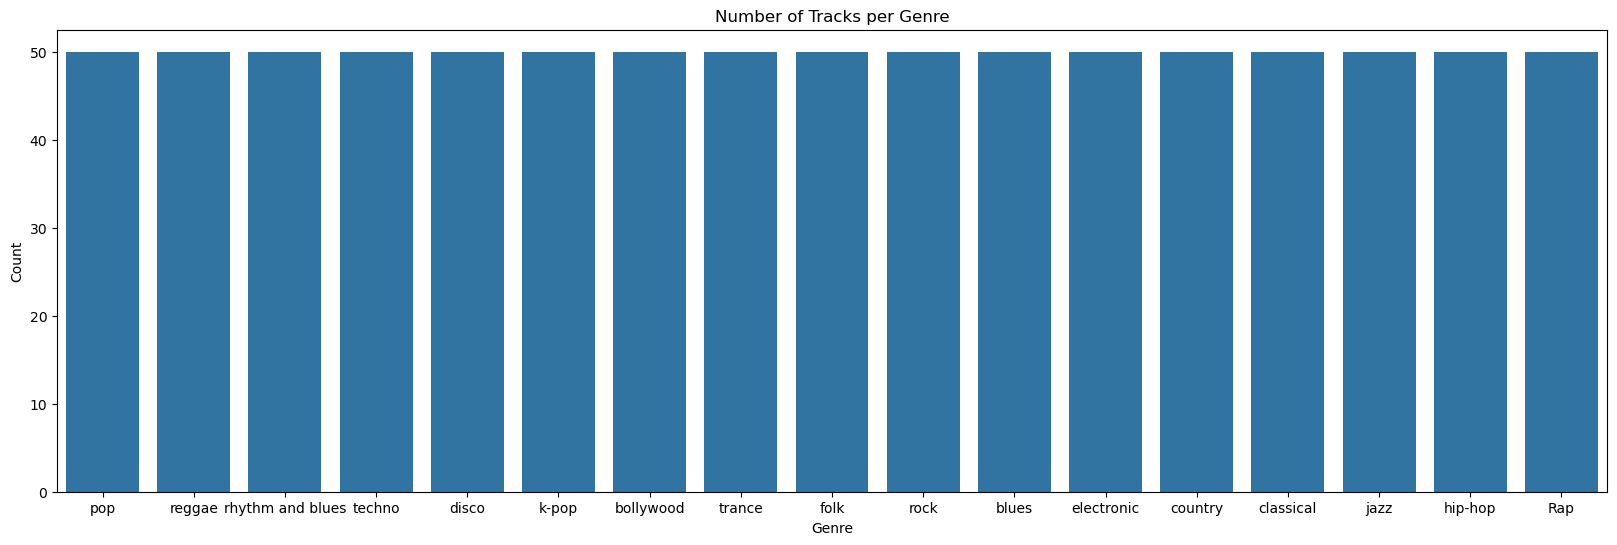

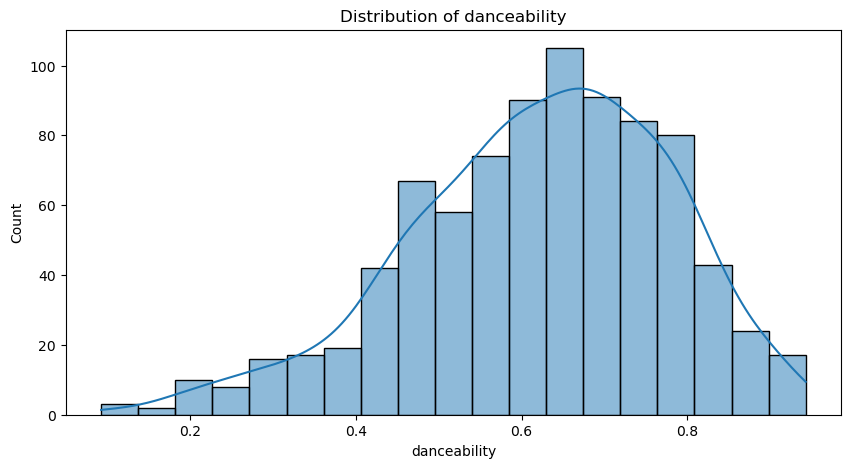

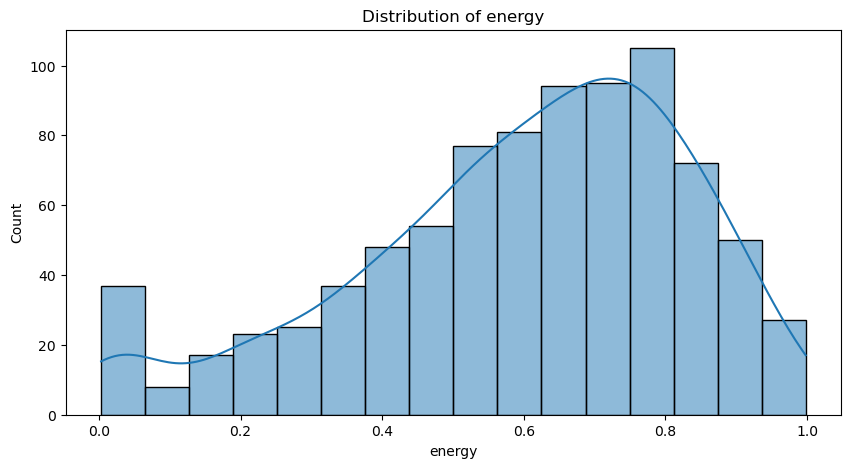

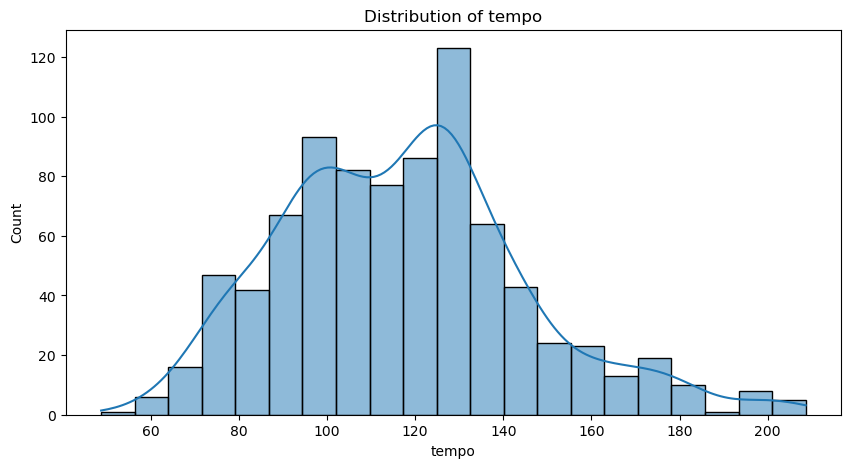

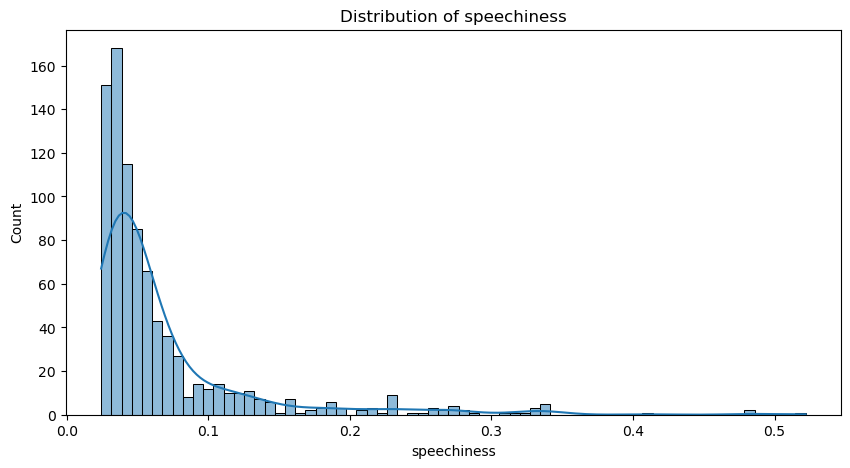

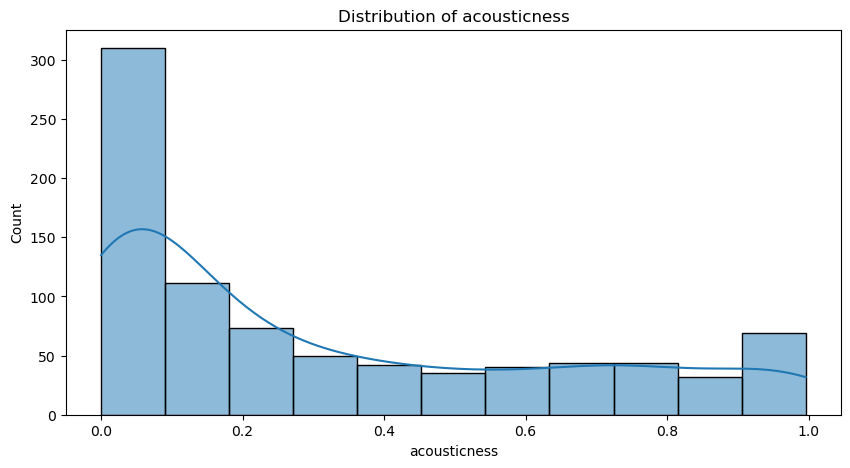

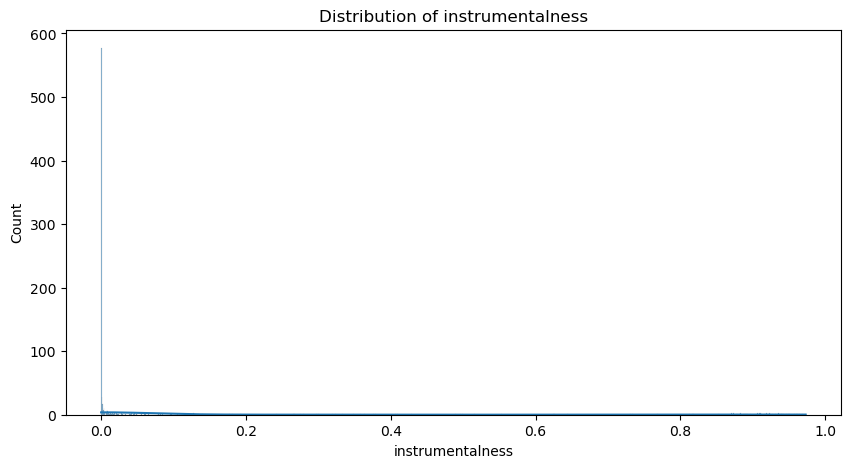

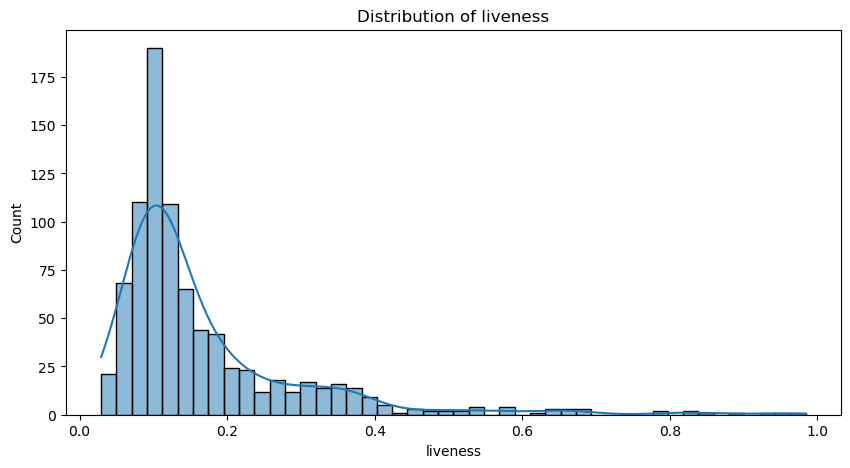

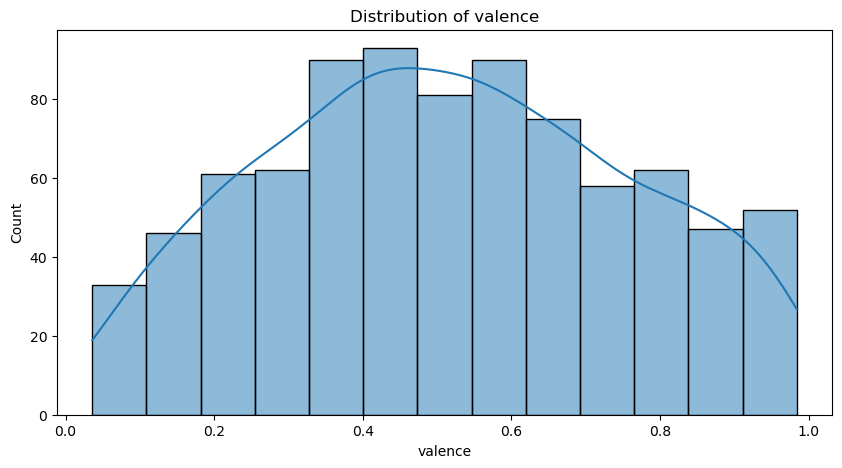

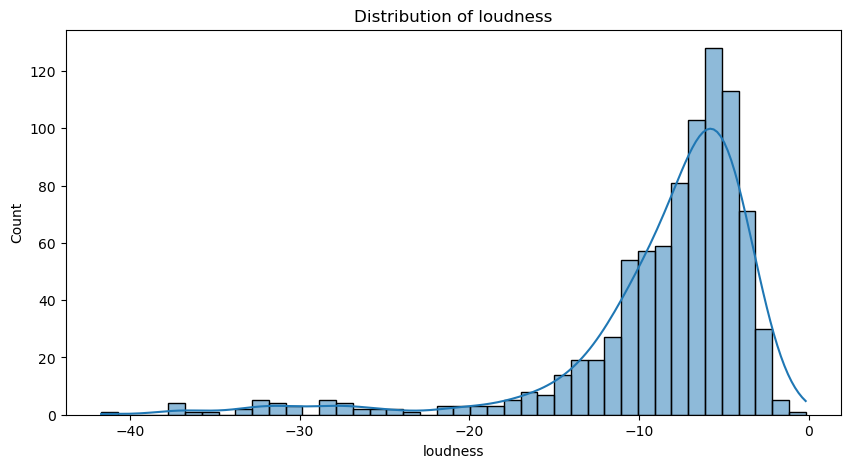

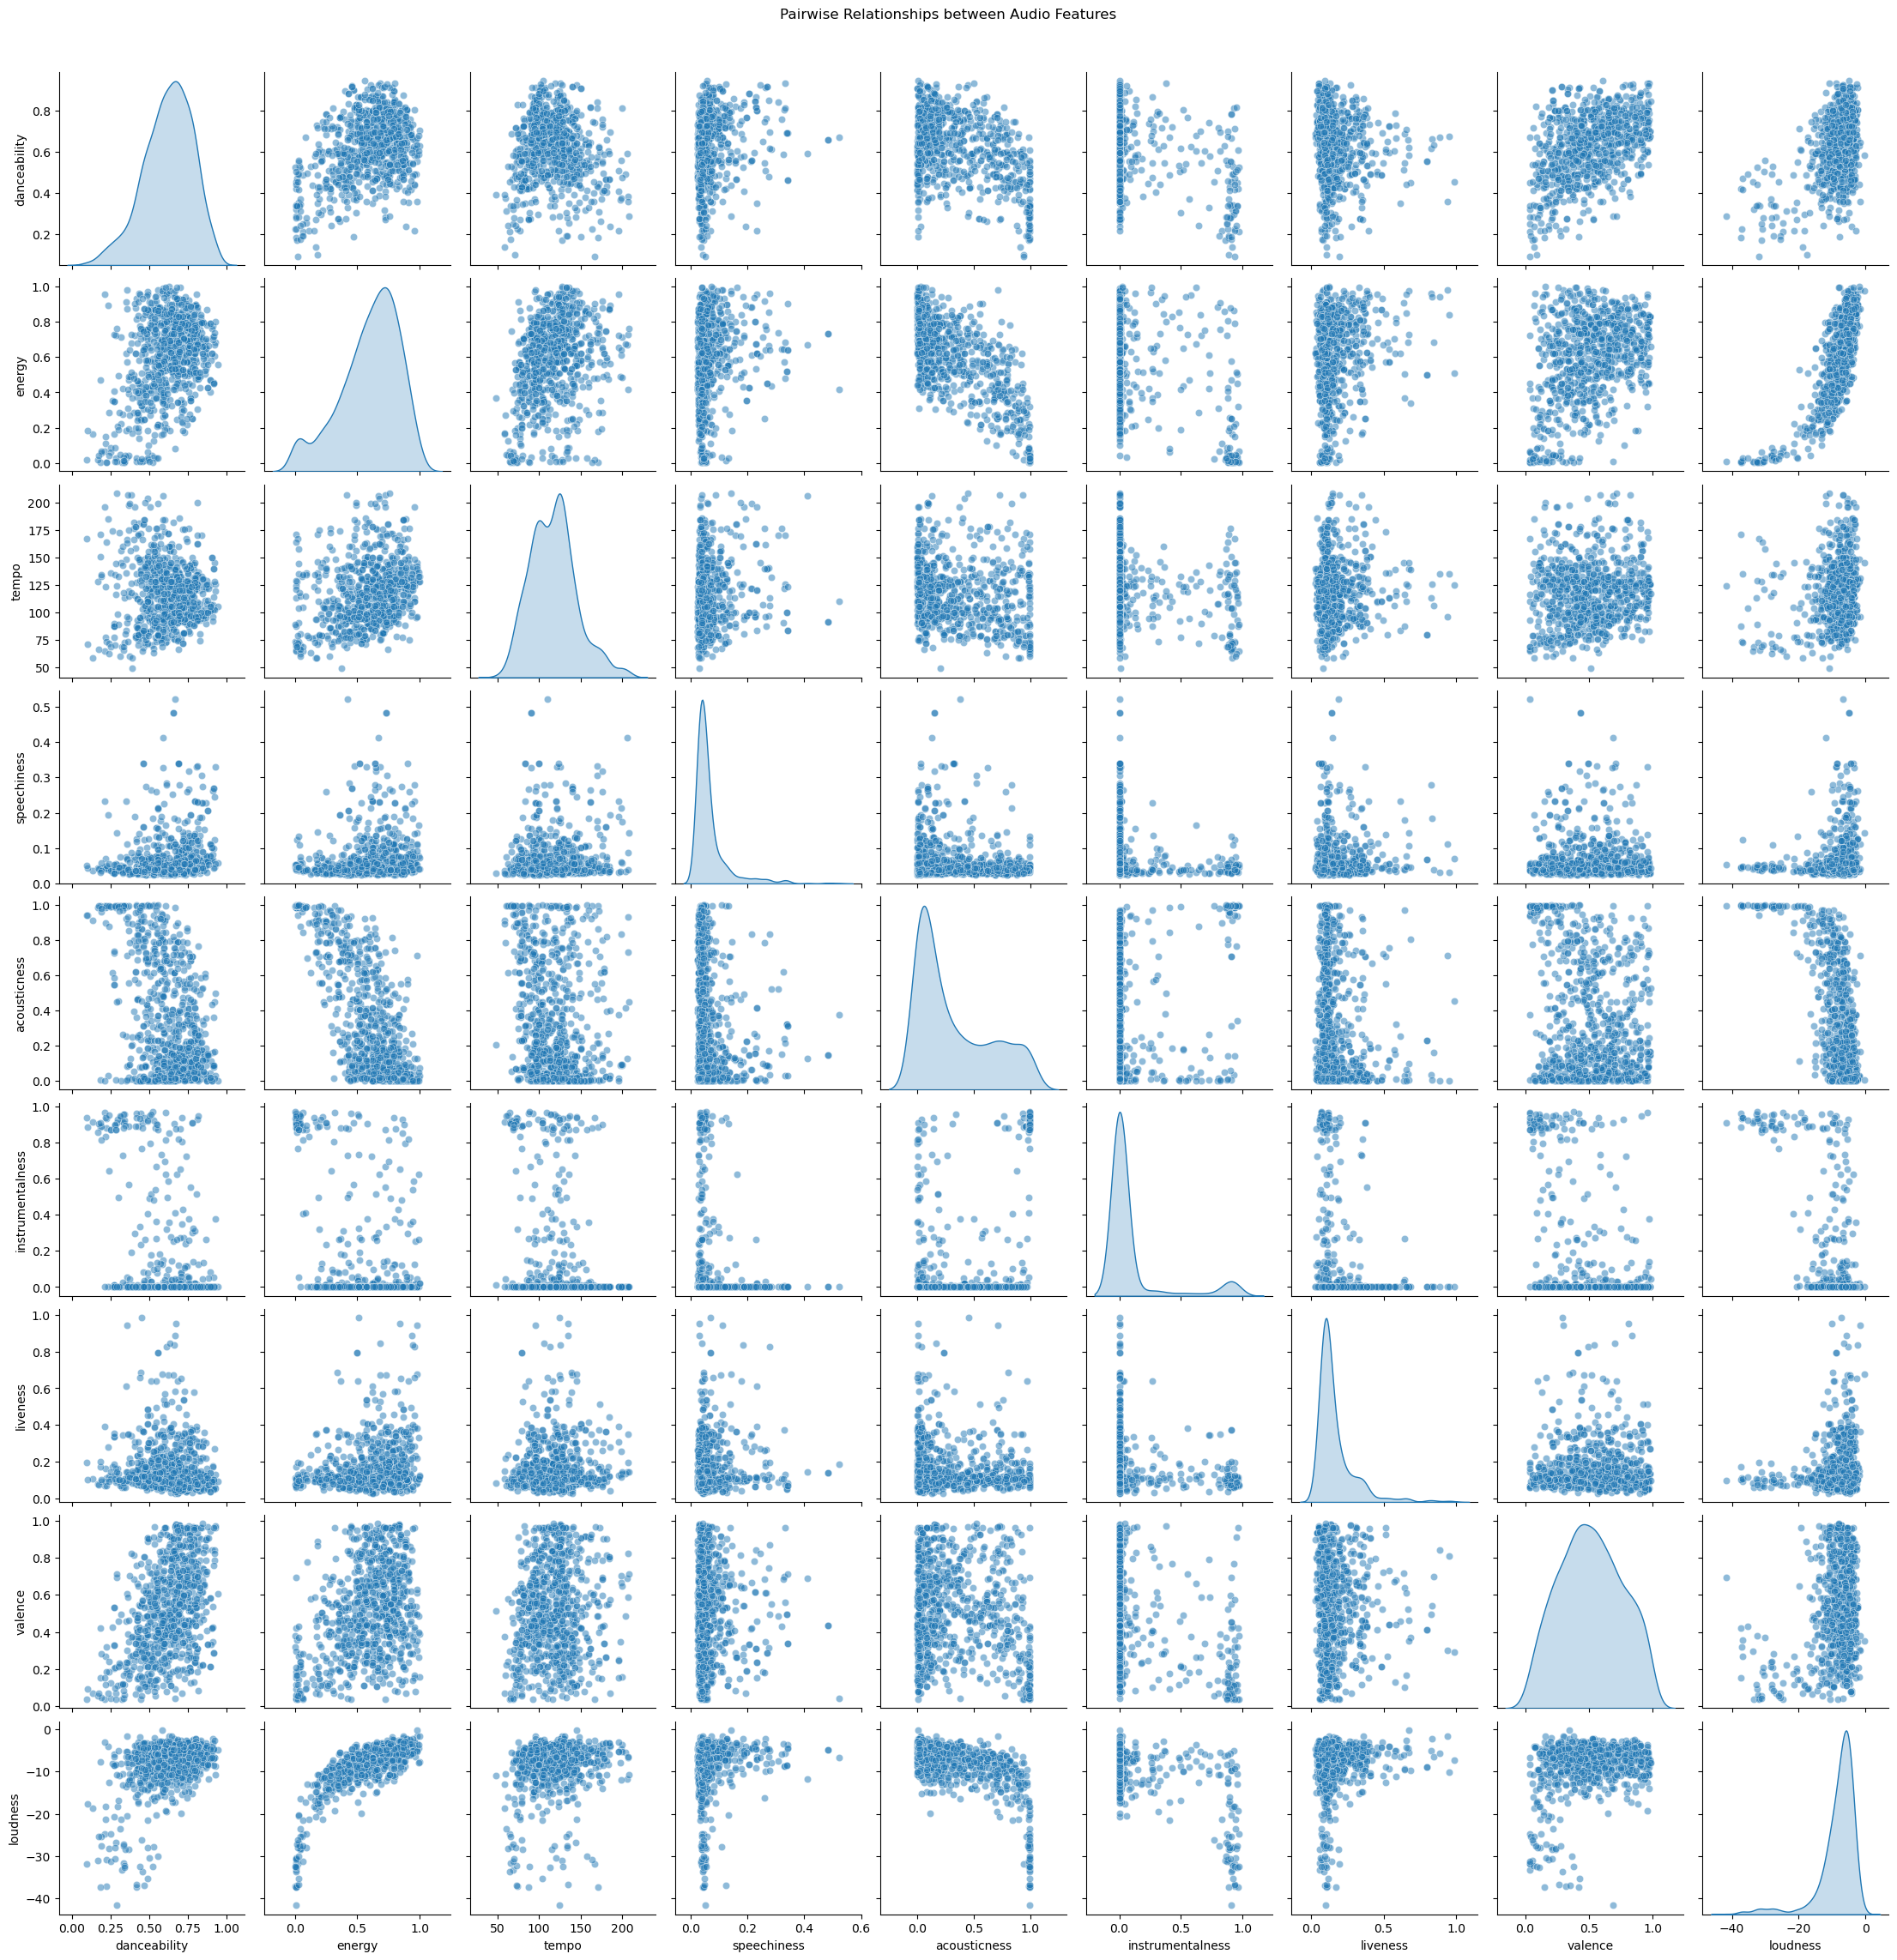

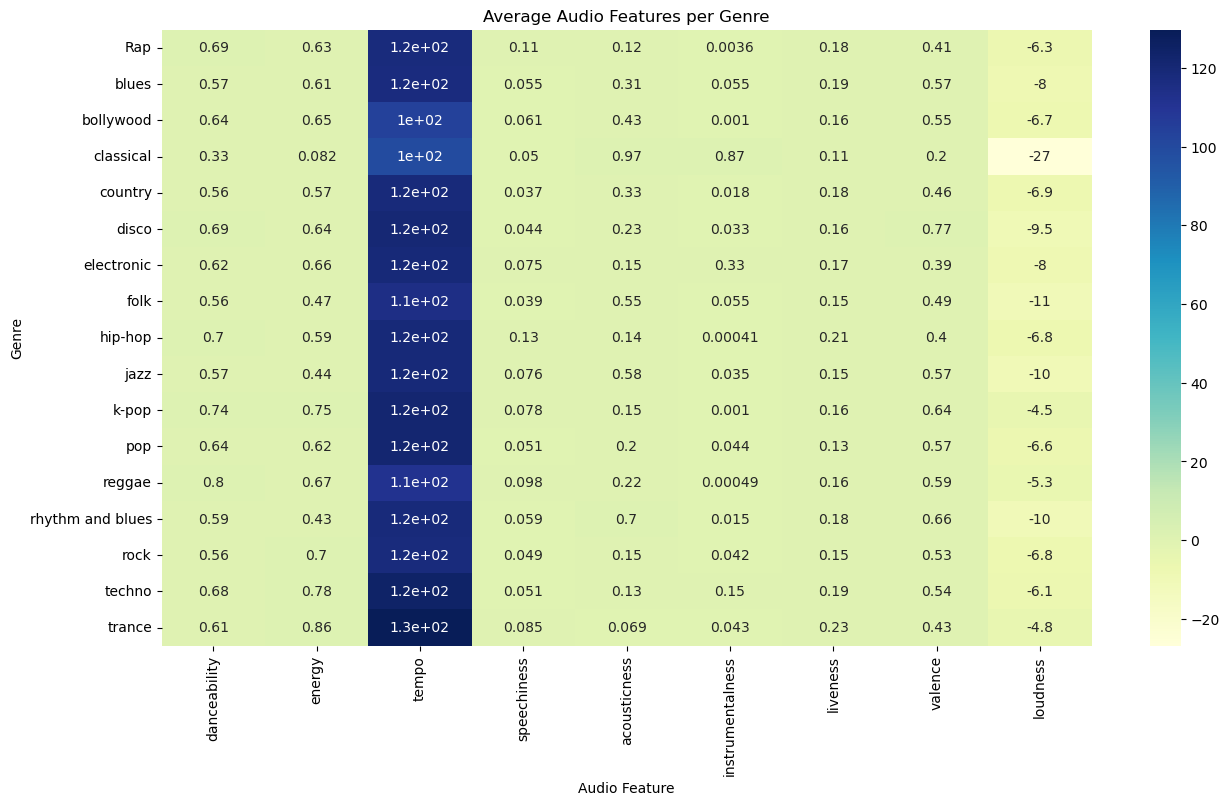

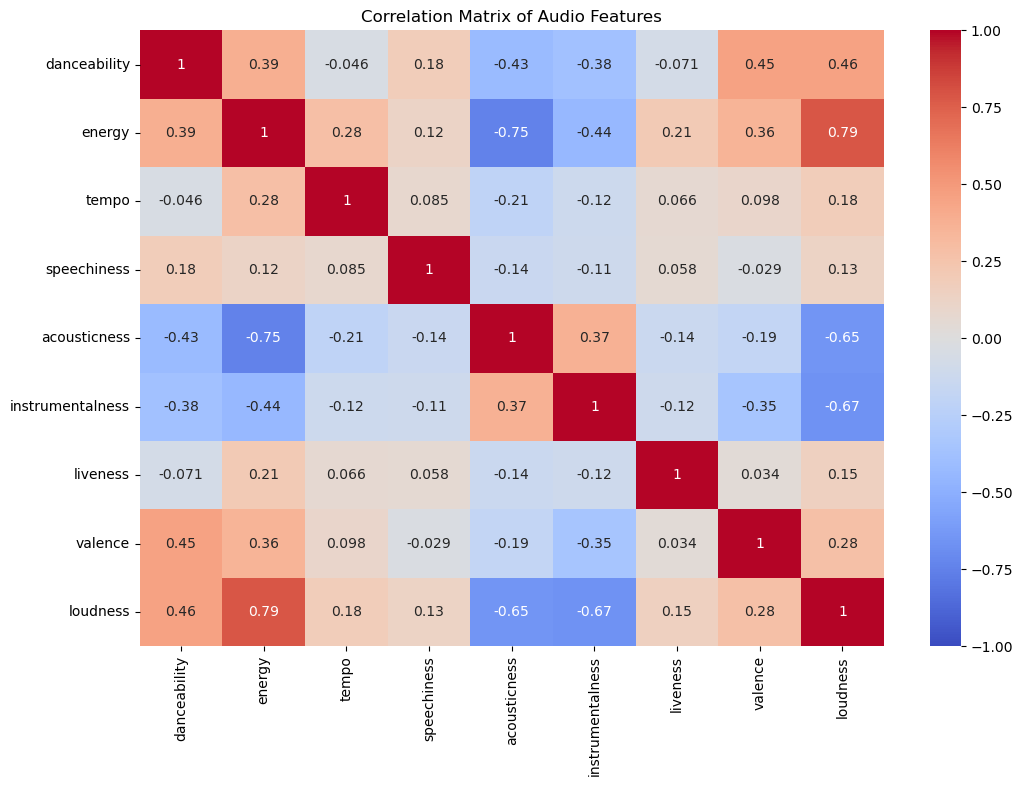

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing genre distribution
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index)
plt.title("Number of Tracks per Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

### 2. Detailed Analysis of Audio Features 
# Distribution of each audio feature
features = ['danceability', 'energy', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness']

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.show()

# Pair plot to see relationships
sns.pairplot(df[features], plot_kws={'alpha': 0.5}, diag_kind='kde')
plt.suptitle("Pairwise Relationships between Audio Features", y=1.02)
plt.show()

### 3. Genre Analysis 
# Average audio features per genre
genre_means = df.groupby('genre')[features].mean()

plt.figure(figsize=(15, 8))
sns.heatmap(genre_means, annot=True, cmap="YlGnBu")
plt.title("Average Audio Features per Genre")
plt.xlabel("Audio Feature")
plt.ylabel("Genre")
plt.show()

### 4. Feature Correlations and Relationships 
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Audio Features")
plt.show()

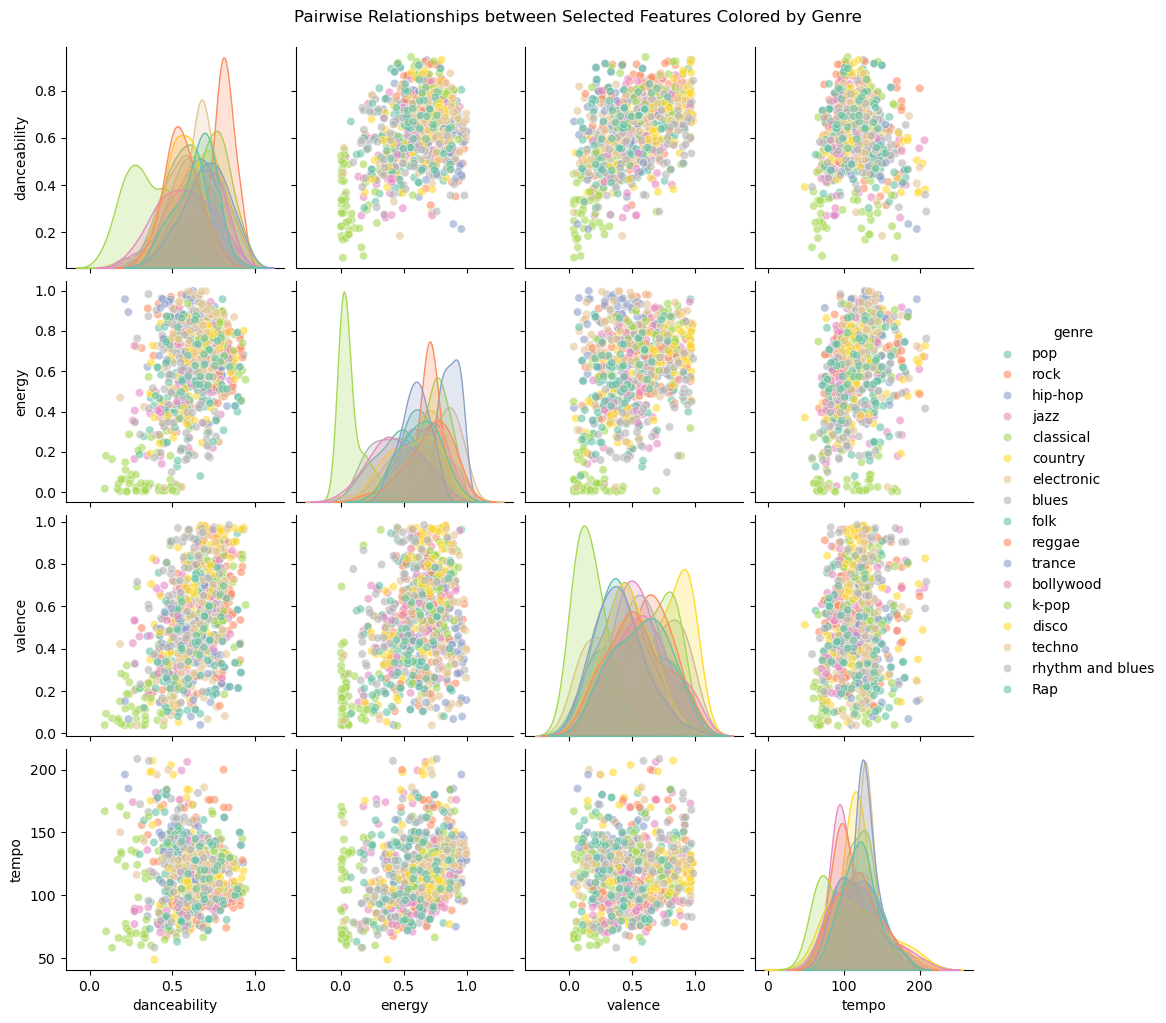

In [57]:
selected_features = ['danceability', 'energy', 'valence', 'tempo']
sns.pairplot(df, vars=selected_features, hue="genre", palette="Set2", plot_kws={'alpha': 0.6})
plt.suptitle("Pairwise Relationships between Selected Features Colored by Genre", y=1.02)
plt.show()

# Explanation of Clustering and PCA Visualization 

This section of code implements K-Means clustering on audio features from a music dataset and visualizes the results using Principal Component Analysis (PCA). It includes a correlation heatmap, the Elbow method to determine the optimal number of clusters, and a scatter plot of clusters in a 2D PCA space.

## 1. Correlation Heatmap
- **Purpose**: To visualize the correlation between different audio features.
- **Method**: 
  - A heatmap is created using Seaborn's `heatmap` function.
  - The correlation matrix is computed for the selected audio features.
- **Details**:
  - The heatmap is sized to 10x8 inches and includes annotations for correlation coefficients.
  - A color gradient (from cool to warm) indicates the strength and direction of the correlations.
  - The title specifies that it shows the correlation of audio features.

## 2. Clustering with K-Means
- **Purpose**: To identify clusters within the audio features dataset using the K-Means algorithm.
- **Standardization**:
  - The audio features are standardized using `StandardScaler` to ensure that all features contribute equally to the distance calculations.
  
### Elbow Method
- **Purpose**: To determine the optimal number of clusters (K) for K-Means clustering.
- **Method**:
  - In the Elbow method, K-Means is fitted for a range of K values (in this case, from 1 to 10).
  - For each K, the inertia is calculated, which measures how tightly the clusters are packed. Inertia is the sum of squared distances from each point to its assigned cluster center.
  - A plot is generated with the number of clusters on the x-axis and the corresponding inertia on the y-axis.
- **Interpretation**:
  - The "elbow" point in the plot is where the inertia begins to decrease at a slower rate, indicating that adding more clusters beyond this point provides diminishing returns in terms of reduced inertia.
  - This elbow point suggests a suitable number of clusters that balances complexity and simplicity, providing a reasonable approximation of the underlying structure in the data.

- **Applying K-Means**:
  - After determining the optimal number of clusters (in this case, set to 4), K-Means is applied to the scaled features, and cluster assignments are added to the original DataFrame.

## 3. PCA for 2D Visualization of Clusters
- **Purpose**: To reduce the dimensionality of the data and visualize the clusters in a two-dimensional space.
- **Method**:
  - PCA is performed to transform the standardized features into two principal components.
  - These components are added to the DataFrame as `pca_1` and `pca_2`.
- **Visualization**:
  - A scatter plot is created to visualize the clusters in the 2D PCA space using Seaborn's `scatterplot`.
  - The points are colored according to their cluster assignments, providing a visual representation of how the clusters are distributed in the reduced feature space.
- **Details**:
  - The plot is sized to 10x7 inches, with labeled axes and a title.
  - A legend indicates the cluster each point belongs to.



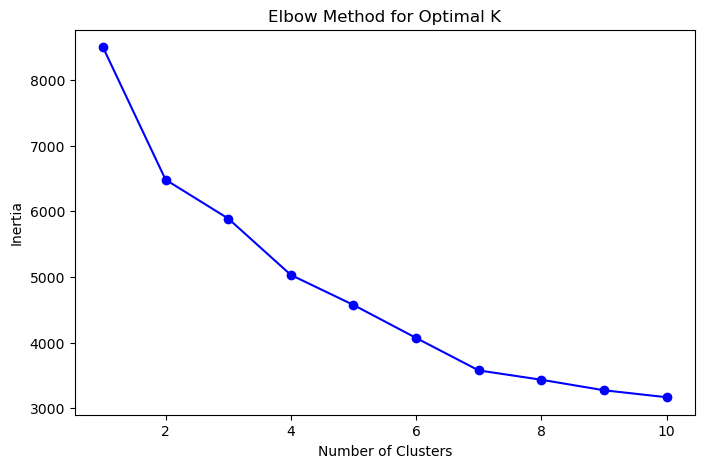

Cluster counts:
 cluster
0    484
2    219
3     93
1     54
Name: count, dtype: int64


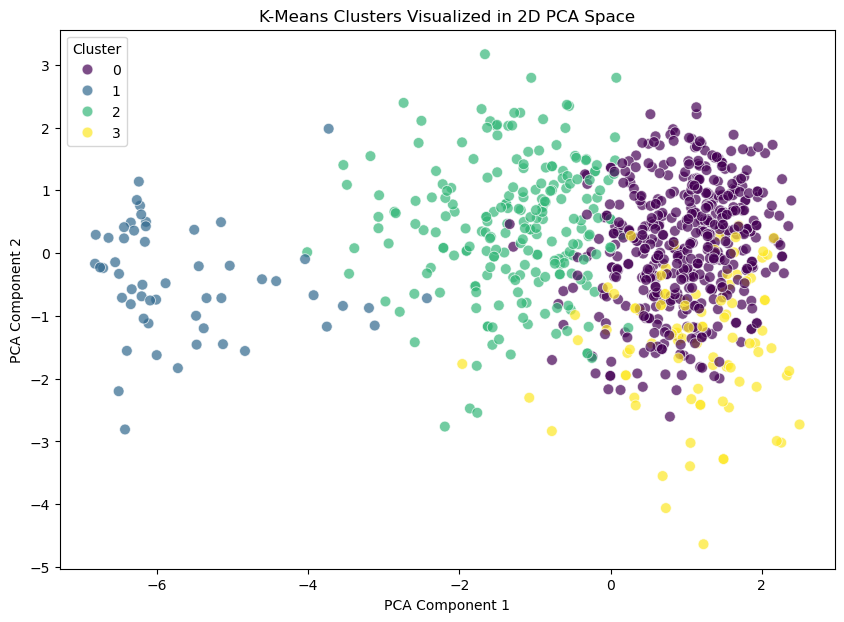

In [51]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Defining list of feature columns explicitly
features = ['danceability', 'energy', 'tempo', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'loudness', 'popularity']



### Clustering with K-Means 
# Standardizing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Choosing the optimal number of clusters with the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Applying K-Means with chosen number of clusters
optimal_k = 4  # Adjust based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Cluster Counts
print("Cluster counts:\n", df['cluster'].value_counts())

### PCA for 2D Visualization of Clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
df['pca_1'] = pca_components[:, 0]
df['pca_2'] = pca_components[:, 1]

# Visualizing Clusters in 2D PCA space
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df, palette="viridis", alpha=0.7, s=60)
plt.title("K-Means Clusters Visualized in 2D PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


# Explanation of K-Means Clustering and PCA Visualization results

This code snippet continues the implementation of K-Means clustering and visualizes the resulting clusters using Principal Component Analysis (PCA).

## Applying K-Means Clustering
- **Number of Clusters**:
  - The variable `k` is defined to represent the number of clusters for the K-Means algorithm. In this example, `k` is set to 4. Alternatively, you could choose 5 based on your findings from the Elbow Method.
  
- **K-Means Implementation**:
  - An instance of the `KMeans` class is created with `n_clusters=k` and a fixed random state (42) for reproducibility.
  - The `fit_predict` method is called on the standardized features (`scaled_features`) to fit the K-Means model and predict the cluster assignments.
  - The resulting cluster labels are added to the DataFrame in a new column named `cluster`.

## Visualization of Clusters Using PCA
- **Dimensionality Reduction**:
  - PCA is applied to the standardized features to reduce their dimensionality to two components for visualization purposes.
  - The `PCA` class is initialized with `n_components=2`, and the transformation is performed using the `fit_transform` method.

- **Plotting the Clusters**:
  - A scatter plot is created to visualize the clusters in the PCA-reduced space.
  - A loop iterates through each cluster, plotting the points belonging to that cluster in a specific color:
    - The x-coordinates correspond to the first PCA component.
    - The y-coordinates correspond to the second PCA component.
  - The `scatter` function is used to plot the points for each cluster, with labels indicating the cluster number.
  
- **Finalizing the Plot**:
  - The x-axis and y-axis are labeled as "PCA Component 1" and "PCA Component 2," respectively.
  - A title is added to the plot: "K-Means Clustering of Tracks (PCA-reduced dimensions)."
  - A legend is included to help identify which color corresponds to each cluster.

- **Display**:
  - The plot is displayed using `plt.show()`, providing a visual representation of how the tracks are grouped into different clusters based on the audio features.



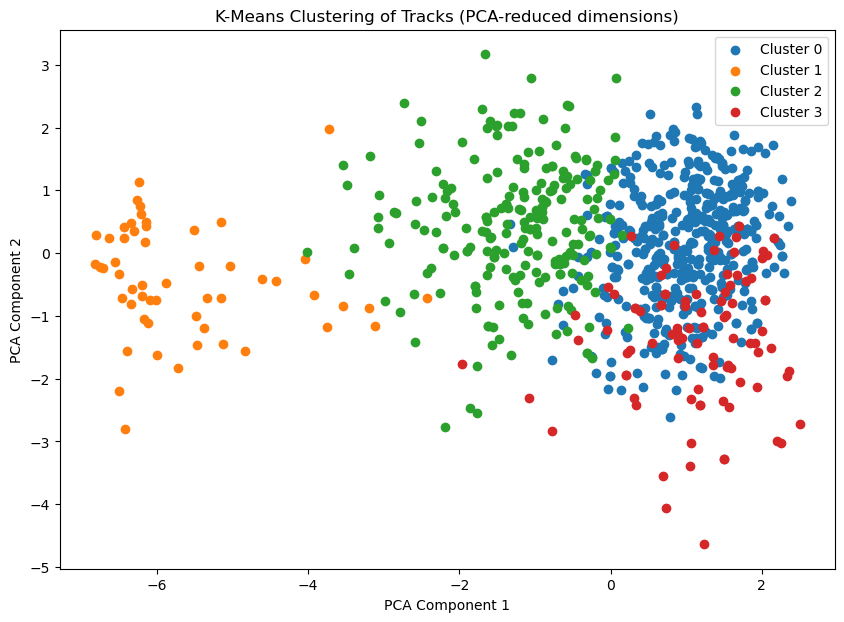

In [9]:
from sklearn.cluster import KMeans

# Defining the number of clusters based on the Elbow Method
k = 4  # or set k = 5 if you prefer

# Applying K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing clusters in a 2D space using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing dimensions with PCA for visualization (2 components)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plotting clusters
plt.figure(figsize=(10, 7))
for cluster in range(k):
    plt.scatter(
        pca_components[df['cluster'] == cluster, 0], 
        pca_components[df['cluster'] == cluster, 1], 
        label=f'Cluster {cluster}'
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Tracks (PCA-reduced dimensions)')
plt.legend()
plt.show()


# Explanation of Cluster Characteristics Calculation

This code snippet focuses on analyzing the characteristics of each cluster derived from the K-Means clustering process. Specifically, it calculates the average values of various audio features for tracks within each cluster.

## Calculating Average Values
- **Group By Operation**:
  - The `groupby` method is used to group the DataFrame `df` by the `cluster` column. This allows us to aggregate the audio features based on their respective clusters.
  
- **Selected Features**:
  - The features for which the average values are computed include:
    - `danceability`
    - `energy`
    - `acousticness`
    - `instrumentalness`
    - `liveness`
    - `valence`
    - `loudness`
    - `popularity`
  
- **Mean Calculation**:
  - The `mean` method is called on the grouped data to calculate the average of each feature for every cluster.
  - The resulting DataFrame, `cluster_characteristics`, contains the mean values of the specified features organized by cluster.

## Output Interpretation
The output presents the average feature values for each cluster:

| Cluster | Danceability | Energy | Acousticness | Instrumentalness | Liveness | Valence | Loudness | Popularity |
|---------|--------------|--------|--------------|-------------------|---------|---------|----------|------------|
| 0       | 0.690667     | 0.704905 | 0.146843    | 0.043472          | 0.129870 | 0.563540 | -6.166430 | 76.000000  |
| 1       | 0.343500     | 0.094544 | 0.959167    | 0.888870          | 0.104880 | 0.187800 | -26.323389 | 53.111111  |
| 2       | 0.549858     | 0.412004 | 0.617778    | 0.054373          | 0.140955 | 0.478952 | -10.353543 | 57.926941  |
| 3       | 0.585839     | 0.767387 | 0.154264    | 0.038180          | 0.461194 | 0.546899 | -5.932151 | 71.569892  |

- Each row corresponds to a cluster, with columns representing the average values of the selected features:
  - **Danceability**: A measure of how suitable a track is for dancing.
  - **Energy**: A measure of intensity and activity.
  - **Acousticness**: A measure of the amount of acoustic sound in a track.
  - **Instrumentalness**: A measure of the likelihood that a track is instrumental.
  - **Liveness**: A measure of the presence of an audience in the recording.
  - **Valence**: A measure of the musical positiveness conveyed by a track.
  - **Loudness**: The overall loudness of a track in decibels (dB).
  - **Popularity**: A score indicating the popularity of a track based on user interactions.

## Conclusion
By examining the average feature values across different clusters, we can gain insights into the characteristics that define each cluster of tracks. This analysis helps in understanding the distribution of musical features and can guide further exploration or recommendations based on cluster profiles.


In [12]:
# Calculating average values of features for each cluster
cluster_characteristics = df.groupby('cluster')[['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'loudness', 'popularity']].mean()
print(cluster_characteristics)


         danceability    energy  acousticness  instrumentalness  liveness  \
cluster                                                                     
0            0.690667  0.704905      0.146843          0.043472  0.129870   
1            0.343500  0.094544      0.959167          0.888870  0.104880   
2            0.549858  0.412004      0.617778          0.054373  0.140955   
3            0.585839  0.767387      0.154264          0.038180  0.461194   

          valence   loudness  popularity  
cluster                                   
0        0.563540  -6.166430   76.000000  
1        0.187800 -26.323389   53.111111  
2        0.478952 -10.353543   57.926941  
3        0.546899  -5.932151   71.569892  


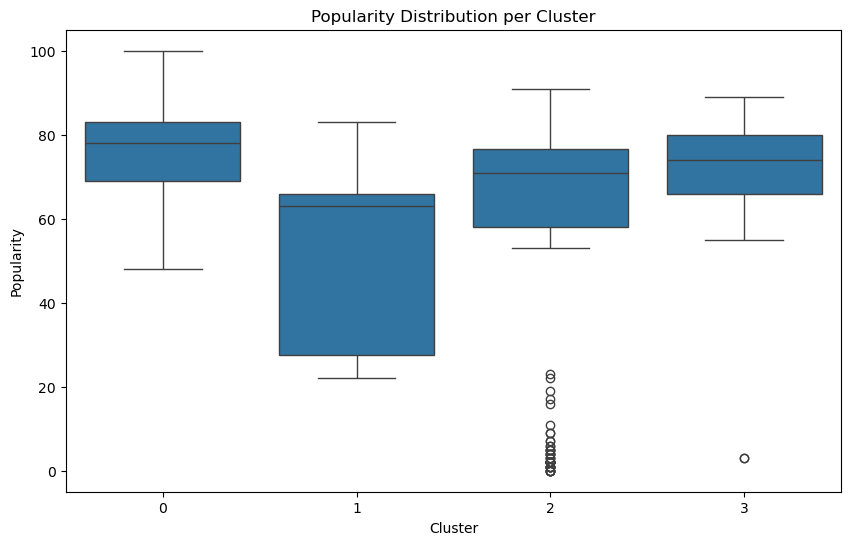

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='popularity', data=df)
plt.title('Popularity Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Popularity')
plt.show()


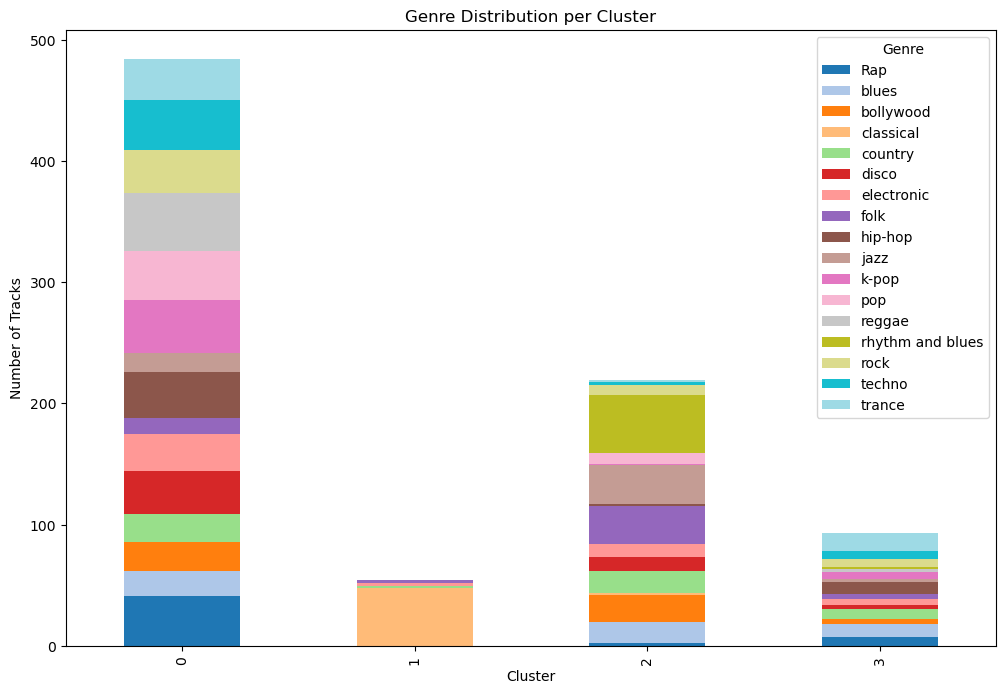

In [16]:
# Calculating genre count per cluster
genre_cluster = df.groupby(['cluster', 'genre']).size().unstack().fillna(0)
genre_cluster.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Genre Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Tracks')
plt.legend(title='Genre')
plt.show()


# Explanation of Song Recommendation Function

This code snippet defines a function to recommend songs similar to a given track based on clustering and popularity metrics.

## Function Definition
- **Function Name**: `recommend_songs`
- **Parameters**:
  - `track_id`: The unique identifier for the track for which recommendations are to be made.
  - `num_recommendations`: The number of recommended songs to return (default is set to 5).

## Function Logic

1. **Track ID Validation**:
   - The function first checks if the provided `track_id` exists in the DataFrame `df`.
   - If the `track_id` is not found, it prints an error message and returns `None`.

2. **Identifying Track Cluster**:
   - If the `track_id` is valid, the function retrieves the cluster associated with that track using:
     ```python
     track_cluster = df.loc[df['track_id'] == track_id, 'cluster'].values[0]
     ```

3. **Filtering Songs in the Same Cluster**:
   - The function filters the DataFrame to include only those songs that belong to the same cluster as the input track:
     ```python
     same_cluster_songs = df[df['cluster'] == track_cluster]
     ```

4. **Excluding the Original Track**:
   - The original song is excluded from the recommendations to avoid self-recommendation:
     ```python
     recommendations = same_cluster_songs[same_cluster_songs['track_id'] != track_id]
     ```

5. **Sorting by Popularity**:
   - The remaining songs are sorted in descending order based on their popularity:
     ```python
     recommendations = recommendations.sort_values(by='popularity', ascending=False)
     ```

6. **Returning Recommendations**:
   - The function returns a DataFrame containing the top N recommended songs (specified by `num_recommendations`) with columns:
     - `track_id`
     - `track_name`
     - `artist_name`
     - `popularity`

## Example Usage
An example is provided to demonstrate how to use the function:
```python
track_id = '0WbMK4wrZ1wFSty9F7FCgu'  
recommendations = recommend_songs(track_id=track_id)


In [24]:
import numpy as np

# Defining function to recommend similar songs
def recommend_songs(track_id, num_recommendations=5):
    # Checking if the track ID exists in DataFrame
    if track_id not in df['track_id'].values:
        print(f"Track ID {track_id} not found in the dataset.")
        return None
    
    # Finding cluster of given track
    track_cluster = df.loc[df['track_id'] == track_id, 'cluster'].values[0]
    
    # Filtering songs from same cluster
    same_cluster_songs = df[df['cluster'] == track_cluster]
    
    # Excluding original song from recommendations
    recommendations = same_cluster_songs[same_cluster_songs['track_id'] != track_id]
    
    # Sorting by popularity for recommendations
    recommendations = recommendations.sort_values(by='popularity', ascending=False)
    
    # Returning top N recommended songs
    return recommendations[['track_id', 'track_name', 'artist_name', 'popularity']].head(num_recommendations)

# Example
track_id = '0WbMK4wrZ1wFSty9F7FCgu'  # Replace with a valid track ID from dataset
recommendations = recommend_songs(track_id=track_id)
if recommendations is not None:
    print("Recommended Songs:\n", recommendations)


Recommended Songs:
                    track_id                    track_name        artist_name  \
0    2plbrEY59IikOBgBGLjaoe              Die With A Smile          Lady Gaga   
1    6dOtVTDdiauQNBQEDOtlAB            BIRDS OF A FEATHER      Billie Eilish   
3    5G2f63n7IPVPPjfNIGih7Q                         Taste  Sabrina Carpenter   
450  6WatFBLVB0x077xWeoVc2k  Si Antes Te Hubiera Conocido            KAROL G   
600  7tI8dRuH2Yc6RuoTjxo4dU                           Who              Jimin   

     popularity  
0           100  
1            98  
3            95  
450          94  
600          92  


In [22]:
print(df['track_id'].head())


0    2plbrEY59IikOBgBGLjaoe
1    6dOtVTDdiauQNBQEDOtlAB
2    0WbMK4wrZ1wFSty9F7FCgu
3    5G2f63n7IPVPPjfNIGih7Q
4    1Es7AUAhQvapIcoh3qMKDL
Name: track_id, dtype: object


# Explanation of the Music Recommendation Function

This code snippet defines a function that generates song recommendations based on similarity metrics and specified filters, including genre, popularity, and feature ranges.

## Function Definition
- **Function Name**: `get_recommendations`
- **Parameters**:
  - `track_id`: The unique identifier of the track for which recommendations are requested.
  - `genre`: Optional; the genre to filter recommendations by (default is `None`).
  - `min_popularity`: Minimum popularity score a track must have to be included in the recommendations (default is `50`).
  - `danceability_range`: Tuple representing the range of danceability values (default is `(0, 1)`).
  - `energy_range`: Tuple representing the range of energy values (default is `(0, 1)`).
  - `tempo_range`: Tuple representing the range of tempo values (default is `(0, 250)`).

## Function Logic

1. **Track ID Validation**:
   - The function searches for the track specified by `track_id` in the DataFrame `df`:
     ```python
     target_track = df[df['track_id'] == track_id]
     ```
   - If the track is not found, it returns an error message.

2. **Feature Extraction**:
   - If the track is found, the function extracts the danceability, energy, and tempo features of the target track:
     ```python
     target_features = target_track[['danceability', 'energy', 'tempo']].values[0]
     ```

3. **Calculating Similarity**:
   - The function computes the similarity of all other tracks to the target track using the Euclidean distance formula:
     ```python
     df['similarity'] = df.apply(lambda x: np.linalg.norm([x['danceability'], x['energy'], x['tempo']] - target_features), axis=1)
     ```
   - Tracks that match the target `track_id` are excluded from the recommendations.

4. **Filtering Recommendations**:
   - If a `genre` is specified, it filters the recommendations to include only tracks of that genre:
     ```python
     if genre:
         recommendations = recommendations[recommendations['genre'] == genre]
     ```
   - It then applies additional filters based on minimum popularity and the specified ranges for danceability, energy, and tempo:
     ```python
     recommendations = recommendations[
         (recommendations['popularity'] >= min_popularity) &
         (recommendations['danceability'] >= danceability_range[0]) &
         (recommendations['danceability'] <= danceability_range[1]) &
         (recommendations['energy'] >= energy_range[0]) &
         (recommendations['energy'] <= energy_range[1]) &
         (recommendations['tempo'] >= tempo_range[0]) &
         (recommendations['tempo'] <= tempo_range[1])
     ]
     ```

5. **Sorting Recommendations**:
   - The recommendations are sorted first by similarity (ascending) and then by popularity (descending):
     ```python
     recommendations = recommendations.sort_values(by=['similarity', 'popularity'], ascending=[True, False])
     ```

6. **Selecting Top Recommendations**:
   - The function returns the top 5 recommendations, including the columns:
     - `track_id`
     - `track_name`
     - `artist_name`
     - `popularity`

## Example Usage
An example is provided to demonstrate how to use the function:
```python
recommendations = get_recommendations(
    track_id='0WbMK4wrZ1wFSty9F7FCgu',
    genre='pop',
    min_popularity=80,
    danceability_range=(0.5, 0.8),
    energy_range=(0.5, 0.9),
    tempo_range=(100, 140)
)


In [28]:
def get_recommendations(track_id, genre=None, min_popularity=50, danceability_range=(0, 1), energy_range=(0, 1), tempo_range=(0, 250)):
    # Finding target track in dataset
    target_track = df[df['track_id'] == track_id]
    if target_track.empty:
        return "Track ID not found in the dataset."
    
    # Getting features of target track
    target_features = target_track[['danceability', 'energy', 'tempo']].values[0]
    
    # Calculating similarity with other tracks (excluding the target track itself)
    df['similarity'] = df.apply(lambda x: np.linalg.norm([x['danceability'], x['energy'], x['tempo']] - target_features), axis=1)
    recommendations = df[df['track_id'] != track_id]
    
    # Applying genre filter 
    if genre:
        recommendations = recommendations[recommendations['genre'] == genre]
    
    # Applying popularity, danceability, energy,& tempo filters
    recommendations = recommendations[
        (recommendations['popularity'] >= min_popularity) &
        (recommendations['danceability'] >= danceability_range[0]) &
        (recommendations['danceability'] <= danceability_range[1]) &
        (recommendations['energy'] >= energy_range[0]) &
        (recommendations['energy'] <= energy_range[1]) &
        (recommendations['tempo'] >= tempo_range[0]) &
        (recommendations['tempo'] <= tempo_range[1])
    ]
    
    # Sorting by similarity & popularity
    recommendations = recommendations.sort_values(by=['similarity', 'popularity'], ascending=[True, False])
    
    # Selecting top 5 recommendations
    return recommendations[['track_id', 'track_name', 'artist_name', 'popularity']].head(5)

# Example 
recommendations = get_recommendations(
    track_id='0WbMK4wrZ1wFSty9F7FCgu',
    genre='pop',
    min_popularity=80,
    danceability_range=(0.5, 0.8),
    energy_range=(0.5, 0.9),
    tempo_range=(100, 140)
)
print(recommendations)


                  track_id                       track_name artist_name  \
18  7tI8dRuH2Yc6RuoTjxo4dU                              Who       Jimin   
10  0mflMxspEfB0VbI1kyLiAv                     Stick Season  Noah Kahan   
33  24XihnoVPWXlKJ4BgXqjVM                   It's ok I'm ok  Tate McRae   
4   1Es7AUAhQvapIcoh3qMKDL    Timeless (with Playboi Carti)  The Weeknd   
44  3FU6urUVsgXa6RBuV2PdRk  Heartless (feat. Morgan Wallen)       Diplo   

    popularity  
18          92  
10          87  
33          86  
4           92  
44          80  


# Explanation of the Music Recommendation System Code

- **Imports**: The code imports the Streamlit library for building the web app and the Pandas library for data manipulation.

- **Data Loading**: This line loads the processed dataset from a CSV file named `spotify_large_dataset.csv` into a Pandas DataFrame named `df`.

- **Recommendation Function**: A function named `get_recommendations` is defined to filter and return song recommendations based on the provided track ID and various audio feature filters. It starts by making a copy of the DataFrame for manipulation.

- **Genre Filtering**: If a genre is specified, the recommendations are filtered to include only those tracks that match the selected genre.

- **Feature Filtering**: The function applies additional filters based on the specified ranges for danceability, energy, and tempo. Each condition checks if the corresponding feature falls within the specified range.

- **Sorting**: The filtered recommendations are sorted by the popularity of the tracks in descending order to prioritize more popular songs.

- **Return Recommendations**: The function returns the top 5 recommended songs, including the track ID, track name, artist name, and popularity.

- **App Title**: Sets the title of the Streamlit app to "Music Recommendation System".

- **Track Selection**: The user is prompted to enter a track ID or name for which they want recommendations.

- **Genre Filter**: A dropdown menu allows users to select a genre from the available genres in the DataFrame.

- **Audio Feature Filters**: Sliders are provided for users to specify the desired ranges for danceability, energy, and tempo.

- **Get Recommendations Button**: When clicked, it triggers the recommendation function, and if a valid track ID is entered, it displays the top recommendations in a table format. If no track ID is provided, a warning message prompts the user to enter one.


In [ ]:
import streamlit as st

# Load the data frame
df = pd.read_csv('spotify_large_dataset.csv')

# Function to get recommendations based on track ID & filters
def get_recommendations(track_id, genre=None, danceability=None, energy=None, tempo=None):
    recommendations = df.copy()

    # Filter by genre
    if genre:
        recommendations = recommendations[recommendations['genre'] == genre]

    # Filter by danceability, energy, and tempo
    if danceability:
        recommendations = recommendations[(recommendations['danceability'] >= danceability[0]) & 
                                          (recommendations['danceability'] <= danceability[1])]
    if energy:
        recommendations = recommendations[(recommendations['energy'] >= energy[0]) & 
                                          (recommendations['energy'] <= energy[1])]
    if tempo:
        recommendations = recommendations[(recommendations['tempo'] >= tempo[0]) & 
                                          (recommendations['tempo'] <= tempo[1])]

    # Sort by popularity
    recommendations = recommendations.sort_values(by='popularity', ascending=False)

    # Displaying top 5 recommendations
    return recommendations[['track_id', 'track_name', 'artist_name', 'popularity']].head(5)

# Streamlit app layout
st.title("Music Recommendation System")

# Track selection
track_id_input = st.text_input("Enter a track ID or name")

# Genre filter
genre_filter = st.selectbox("Select Genre", options=df['genre'].unique())

# Audio feature filters
danceability_range = st.slider("Danceability", 0.0, 1.0, (0.2, 0.8))
energy_range = st.slider("Energy", 0.0, 1.0, (0.3, 0.9))
tempo_range = st.slider("Tempo", 50.0, 200.0, (80.0, 120.0))

# Show recommendations
if st.button("Get Recommendations"):
    if track_id_input:
        recommendations = get_recommendations(track_id_input, genre=genre_filter,
                                              danceability=danceability_range,
                                              energy=energy_range,
                                              tempo=tempo_range)
        st.write("Top Recommendations:")
        st.dataframe(recommendations)
    else:
        st.warning("Please enter a track ID or name.")
